In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

import warnings

from stats import win_rate, count, played, goals_scored_total, goals_scored_avg, goals_lost_total, goals_lost_avg

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
from stats import win_rate, count, played, goals_scored_total, goals_scored_avg, goals_lost_total, goals_lost_avg

In [6]:
goals_scored_total

<function stats.goals_scored_total(df, name, position='all')>

In [7]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

D:\miniconda\envs\foos\python.exe
3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=3, releaselevel='final', serial=0)


In [5]:
# df = pd.read_csv('data/seuk_scores.csv', sep = ';', parse_dates=['Date'])
# df = df.drop('Date', axis = 1)
df_1 = pd.read_excel('data/seuk_04.xlsx')
df = df_1.drop('Date', axis = 1)

In [18]:
df_1.dtypes

Date         datetime64[ns]
Attack_1             object
Defence_1            object
Attack_2             object
Defence_2            object
G1                    int64
G2                    int64
Win                   int64
dtype: object

In [19]:
grouped = df_1.groupby(['Date']).count()['Win']

In [20]:
# dates = pd.concat([grouped.index, grouped.values], axis = 1)

In [21]:
grouped.index

DatetimeIndex(['2023-03-28', '2023-03-30', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-13', '2023-04-18', '2023-04-20',
               '2023-04-25', '2023-04-27', '2023-05-09', '2023-05-11',
               '2023-05-16', '2023-05-18', '2023-05-23', '2023-05-25',
               '2023-05-30', '2023-06-01', '2023-06-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

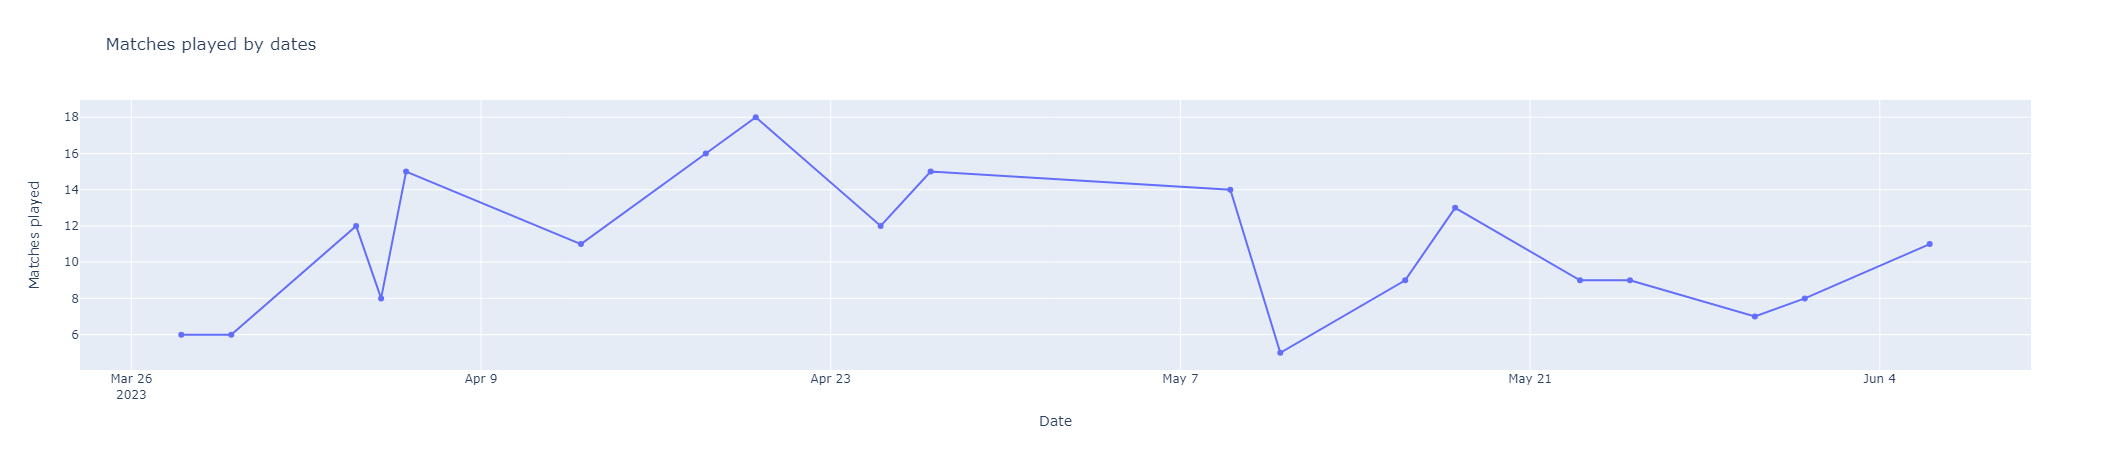

In [22]:
px.line(x = grouped.index, 
        y = grouped.values,
        title='Matches played by dates', 
        labels={ "x": "Date",
                 "y": "Matches played"}, 
        markers = True, 
        height=450,
        width=800 )

In [52]:
players = list(np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values))

In [53]:
players

['Dawid', 'Eryk', 'Krzysiu', 'Kuba', 'Szymon', 'Wojtek']

In [23]:
def count(lst):
    return sum(bool(x) for x in lst)

In [33]:
def played(df, name, position = 'all'):
    
    '''Calculating all matches played by played'''
    
    if position == 'all':       
        played = len(df.loc[(df['Attack_1'] == name) | (df['Attack_2'] == name) | (df['Defence_1'] == name) | (df['Defence_2'] == name)])
        
    elif position == 'attack':
        played = len(df.loc[(df['Attack_1'] == name) | (df['Attack_2'] == name)])
    
    elif position == 'defence':
        played = len(df.loc[(df['Defence_1'] == name) | (df['Defence_2'] == name)])
        
    
    return played

In [34]:
def win_rate(df, name, position = 'all'):
    
    ''' Calculating players win rate '''
    
    if position == 'all':
        
        wins_1 = len(df.loc[((df['Attack_1'] == name) | (df['Defence_1'] == name)) & df['Win'] == 1])
        wins_2 = len(df.loc[(df['Win'] == 2) & ((df['Attack_2'] == name) | (df['Defence_2'] == name))])
        wins_total = wins_1 + wins_2
        all_matches = played(df, name, position = 'all')
        winrate = round((wins_total/all_matches) * 100, 1)
        
    elif position == 'attack':
        
        wins_1 = len(df.loc[(df['Attack_1'] == name) & (df['Win'] == 1)])
        wins_2 = len(df.loc[(df['Attack_2'] == name) & (df['Win'] == 2)])
        wins_total = wins_1 + wins_2
        all_matches_attack = played(df, name, position = 'attack')
        winrate = round((wins_total/all_matches_attack) * 100, 1)
    
    elif position == 'defence':
        wins_1 = len(df.loc[(df['Defence_1'] == name) & (df['Win'] == 1)])
        wins_2 = len(df.loc[(df['Defence_2'] == name) & (df['Win'] == 2)])
        wins_total = wins_1 + wins_2
        all_matches_defence = played(df, name, position = 'defence')
        winrate = round((wins_total/all_matches_defence) * 100, 1)
    
    return winrate

In [35]:
def goals_scored_total(df, name, position = 'all'):
    
    ''' Calculating total goals scored by player '''
    if position == 'all':

        goals_1 = df.loc[(df['Attack_1'] == name) | (df['Defence_1'] == name)]['G1'].sum()
        goals_2 = df.loc[(df['Attack_2'] == name) | (df['Defence_2'] == name)]['G2'].sum()
        goals_total = goals_1 + goals_2
    
    elif position == 'attack':
        
        goals_1 = df.loc[df['Attack_1'] == name]['G1'].sum()
        goals_2 = df.loc[df['Attack_2'] == name]['G2'].sum()
        goals_total = goals_1 + goals_2
        
    elif position == 'defence':
        
        goals_1 = df.loc[df['Defence_1'] == name]['G1'].sum()
        goals_2 = df.loc[df['Defence_2'] == name]['G2'].sum()
        goals_total = goals_1 + goals_2
              
        
    return goals_total


In [36]:
def goals_lost_total(df, name, position = 'all'):
    
    ''' Calculating total goals lost by player '''
    if position == 'all':

        goals_1 = df.loc[(df['Attack_1'] == name) | (df['Defence_1'] == name)]['G2'].sum()
        goals_2 = df.loc[(df['Attack_2'] == name) | (df['Defence_2'] == name)]['G1'].sum()
        goals_total = goals_1 + goals_2
    
    elif position == 'attack':
        
        goals_1 = df.loc[df['Attack_1'] == name]['G2'].sum()
        goals_2 = df.loc[df['Attack_2'] == name]['G1'].sum()
        goals_total = goals_1 + goals_2
        
    elif position == 'defence':
        
        goals_1 = df.loc[df['Defence_1'] == name]['G2'].sum()
        goals_2 = df.loc[df['Defence_2'] == name]['G1'].sum()
        goals_total = goals_1 + goals_2
              
        
    return goals_total


In [37]:
def goals_scored_avg(df, name, position = 'all'):
    
    ''' Calculating avg goals scored by player per match while on diffrent position '''

    if position == 'all':
        
        goals = goals_scored_total(df, name, position = 'all')
        matches = played(df, name, position = 'all')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'attack':
        
        goals = goals_scored_total(df, name, position = 'attack')
        matches = played(df, name, position = 'attack')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'defence':
        
        goals = goals_scored_total(df, name, position = 'defence')
        matches = played(df, name, position = 'defence')
        avg_goals = round((goals/matches), 1)
        
        
    return avg_goals
    

In [38]:
def goals_lost_avg(df, name, position = 'all'):
    
    ''' Calculating avg goals lost by player per match while on difftent position '''

    if position == 'all':
        
        goals = goals_lost_total(df, name, position = 'all')
        matches = played(df, name, position = 'all')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'attack':
        
        goals = goals_lost_total(df, name, position = 'attack')
        matches = played(df, name, position = 'attack')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'defence':
        
        goals = goals_lost_total(df, name, position = 'defence')
        matches = played(df, name, position = 'defence')
        avg_goals = round((goals/matches), 1)
        
        
    return avg_goals
    

In [39]:
all_players  = np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values)

In [40]:
goals_lost_avg(df, 'Szymon', 'attack')


4.6

In [51]:
x = goals_scored_total(df, 'Szymon', position = 'all')
x

1121

In [42]:

print('played')
for player in all_players:
    print(f'{player}:', win_rate(df, player, position = 'all'))

played
Dawid: 50.8
Eryk: 41.3
Krzysiu: 30.8
Kuba: 60.9
Szymon: 70.1
Wojtek: 46.1


In [49]:

print('Win rates (all matches)')
for player in all_players:
    x = played(df, player, position = 'all' )
    print(f'{player}:', x)

Win rates (all matches)


UnboundLocalError: cannot access local variable 'played' where it is not associated with a value

In [330]:
for player in all_players:
    print(f'{player}:', goals_lost_avg(df, player, position = 'defence'))
    

Dawid: 6.3
Eryk: 5.5
Krzysiu: 6.8
Kuba: 4.8
Szymon: 5.9
Wojtek: 7.1


In [327]:
for player in all_players:
    winrate = win_rate(df, player, position = 'defence')
    print(player, winrate)

Dawid 44.4
Eryk 83.3
Krzysiu 30.0
Kuba 100.0
Szymon 55.6
Wojtek 30.0


In [181]:
df.dtypes

Attack_1     object
Defence_1    object
Attack_2     object
Defence_2    object
G1            int64
G2            int64
Win           int64
dtype: object

In [14]:
df_1.head()

,Date,Attack_1,Defence_1,Attack_2,Defence_2,G1,G2,Win
0,2023-03-28,Szymon,Dawid,Eryk,Wojtek,8,5,1
1,2023-03-28,Dawid,Szymon,Wojtek,Eryk,7,8,2
2,2023-03-28,Szymon,Krzysiu,Kuba,Wojtek,8,3,1
3,2023-03-28,Krzysiu,Szymon,Wojtek,Kuba,7,8,2
4,2023-03-28,Szymon,Wojtek,Dawid,Krzysiu,8,5,1


### Winrate with partner total

In [54]:

def winrate_w_partner(df, name, name2, position = 'total'):
    

    if position == 'total':

        played_1 = df_1.loc[((df_1['Attack_1'] == name) & 
                        (df_1['Defence_1'] == name2)) | 
                        ((df_1['Attack_1'] == name2) & 
                        (df_1['Defence_1'] == name))]

        played_2 = df_1.loc[((df_1['Attack_2'] == name) & 
                        (df_1['Defence_2'] == name2)) | 
                        ((df_1['Attack_2'] == name2) & 
                        (df_1['Defence_2'] == name))]

        wins_1 = played_1.loc[df_1['Win'] == 1]
        wins_2 = played_2.loc[df_1['Win'] == 2]

        played_all = len(played_1) + len(played_2)
        
        wins_total = len(wins_1) + len(wins_2)
        
        try:
                
            winrate = round(((wins_total/played_all)*100), 1)
            
        except:
            
            winrate = 'Not enough data'
        
        
    elif position == 'attack':

        played_1 = df_1.loc[((df_1['Attack_1'] == name) & 
                        (df_1['Defence_1'] == name2))]
        
        played_2 = df_1.loc[((df_1['Attack_2'] == name) & 
                        (df_1['Defence_2'] == name2))]
                       

        wins_1 = played_1.loc[df_1['Win'] == 1]
        wins_2 = played_2.loc[df_1['Win'] == 2]

        played_all = len(played_1) + len(played_2)
        
        wins_total = len(wins_1) + len(wins_2)
        
        try:
            
            winrate = round(((wins_total/played_all)*100), 1)
            
        except:
            
            winrate = 'Not enough data'
            
        
    elif position == 'defence':

        played_1 = df_1.loc[((df_1['Attack_1'] == name2) & 
                        (df_1['Defence_1'] == name))]
        
        played_2 = df_1.loc[((df_1['Attack_2'] == name2) & 
                        (df_1['Defence_2'] == name))]
                       

        wins_1 = played_1.loc[df_1['Win'] == 1]
        wins_2 = played_2.loc[df_1['Win'] == 2]

        played_all = len(played_1) + len(played_2)
        
        wins_total = len(wins_1) + len(wins_2)
        
        try:
            
            winrate = round(((wins_total/played_all)*100), 1)
            
        except:
            
            winrate = 'Not enough data'
            
        
    return winrate

In [61]:
x= winrate_w_partner(df = df_1, name = 'Kuba', name2 = 'Krzysiu' , position = 'attack')
x

40.0

### Winrate with partner when player on attack

In [8]:
df_1.columns

Index(['Date', 'Attack_1', 'Defence_1', 'Attack_2', 'Defence_2', 'G1', 'G2',
       'Win'],
      dtype='object')

In [10]:
names = df['Attack_1'].unique()
names

array(['Szymon', 'Dawid', 'Krzysiu', 'Wojtek', 'Kuba', 'Eryk'],
      dtype=object)

In [16]:
df_dumm = pd.get_dummies(df_1, columns = ['Attack_1', 'Defence_1', 'Attack_2', 'Defence_2'])

df_bad = pd.DataFrame(columns = ["name", "index"])
k = 0
for name in names:
    cols = [i for i in df_dumm.columns if name in i]
    s = df_dumm[cols].sum(axis = 1)
    for index in s.where(s > 1).dropna().index:
        df_bad.loc[k] = name, index
        k += 1

In [28]:
def rankings(df, kpi):
    
    """Creating DataFrame with player name and calculated metric
    
    params:
        df : pd.DataFrame - dataset with gathered scores from matches
        kpi : str - name of statistic to calculate
        
    return:
        df_kpi : pd.DataFrame - dataframe with player names and calculated statistics, adequate sorted
    
    """
    
    all_players = np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values)
    df_kpi = pd.DataFrame(columns = ['Player name', 'kpi'])
    
    if kpi == 'Winrate on attack':

        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(win_rate(df = df, name = name, position = 'attack'), 2)
        
    elif kpi == 'Winrate on defence':

        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(win_rate(df = df, name = name, position = 'defence'), 2)
        
    elif kpi == 'Winrate total':
    
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(win_rate(df = df, name = name, position = 'all'), 2)
        
    elif kpi == 'Played total':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = played(df, name, position = 'all')
            
    elif kpi == 'Played on attack':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = played(df, name, position = 'attack')
            
    elif kpi == 'Played on defence':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = played(df, name, position = 'defence')
        
    elif kpi == 'Avg goals scored while on attack':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(goals_scored_avg(df, name, position = 'attack'), 2)
            
    elif kpi == 'Avg goals scored while on defence':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(goals_scored_avg(df, name, position = 'defence'), 2)
            
    elif kpi == 'Avg goals lost while on defence':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(goals_lost_avg(df, name, position = 'defence'), 2)
            
    elif kpi == 'Avg goals lost while on attack':
        
        for idx, name in enumerate(all_players):
            df_kpi.loc[idx, 'Player name'] = name
            df_kpi.loc[idx, 'kpi'] = round(goals_lost_avg(df, name, position = 'attack'), 2)
            
    if (kpi == 'Avg goals lost while on defence') | (kpi == 'Avg goals lost while on attack'):
        df_kpi.sort_values('kpi', inplace = True, ascending  = True)
    else:
        df_kpi.sort_values('kpi', inplace = True, ascending  = False)
        
    df_kpi.reset_index(inplace = True, drop = True)
    df_kpi.index += 1 
    # df_kpi = df_kpi.rename(columns = {'index':'Rank'})
    df_kpi.rename(columns = {'kpi' : kpi}, inplace = True)
    
    
    return df_kpi
    

In [29]:
tmp = rankings(df, 'Winrate on attack')
tmp

,Player name,Winrate on attack
1,Szymon,77.89
2,Dawid,53.25
3,Kuba,51.79
4,Eryk,51.35
5,Wojtek,43.9
6,Krzysiu,25.24


In [11]:
all_players = np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values)


In [67]:
all_players = np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values)
kpi = 'Win rate on attack'
if kpi == 'Win rate on attack':

    df_kpi = pd.DataFrame(columns = ['name', 'Win rate on attack'])


    for idx, name in enumerate(all_players):
        df_kpi.loc[idx, 'name'] = name
        df_kpi.loc[idx, 'Win rate on attack'] = win_rate(df = df, name = name, position = 'attack')

    df_kpi.sort_values('Win rate on attack', inplace = True, ascending  = False)
    df_kpi = df_kpi.reset_index(drop = True)

In [68]:
df_kpi

,name,Win rate on attack
0,Szymon,77.9
1,Dawid,53.2
2,Kuba,51.8
3,Eryk,51.4
4,Wojtek,43.9
5,Krzysiu,25.2


In [50]:
for name in all_players:
    print(name)

Dawid
Eryk
Krzysiu
Kuba
Szymon
Wojtek


In [17]:
# def data_prep(df, model_df):
df_dumm = pd.get_dummies(df_1, columns = ["Attack_1","Defence_1", "Attack_2", "Defence_2"])
attack_columns = [col for col in df_dumm.columns if 'Attack' in col]    
defence_columns = [col for col in df_dumm.columns if 'Defence' in col] 

In [18]:
all_columns = attack_columns + defence_columns

In [20]:
df_dumm[all_columns]

,Attack_1_Dawid,Attack_1_Eryk,Attack_1_Krzysiu,Attack_1_Kuba,Attack_1_Szymon,Attack_1_Wojtek,Attack_2_Dawid,Attack_2_Eryk,Attack_2_Krzysiu,Attack_2_Kuba,...,Defence_1_Krzysiu,Defence_1_Kuba,Defence_1_Szymon,Defence_1_Wojtek,Defence_2_Dawid,Defence_2_Eryk,Defence_2_Krzysiu,Defence_2_Kuba,Defence_2_Szymon,Defence_2_Wojtek
0,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
238,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
239,False,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
240,True,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True


In [1]:
np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values

SyntaxError: incomplete input (1526081934.py, line 1)